<a href="https://colab.research.google.com/github/snow-white2024/first-repository/blob/master/MNIST_%EC%9E%A1%EC%9D%8C%2C%EB%9E%9C%EB%8D%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#5-1 MNIST에 백색 잡음 픽셀과 0픽셀 추가하기

from tensorflow.keras.datasets import mnist  # MNIST 데이터셋을 가져오기 위한 모듈
import numpy as np                           # 배열 연산과 난수 생성을 위해 NumPy를 사용

# MNIST 데이터셋 불러오기 (훈련 데이터와 테스트 데이터)
# train_images: 훈련용 이미지 데이터 (60000장, 각 28x28 크기)
# train_labels: 훈련용 레이블 데이터 (60000개의 숫자 레이블)
# 테스트 데이터는 사용하지 않으므로 '_'로 무시
(train_images, train_labels), _ = mnist.load_data()

# 이미지 데이터 (28x28 크기)를 1차원 벡터(784길이)로 펼치기
# 결과적으로 train_images는 (60000, 784) 크기의 배열이 됨
train_images = train_images.reshape((60000, 28 * 28))

# 이미지를 float32 타입으로 변환하고, 255로 나누어 0~1 범위로 정규화
# (딥러닝 모델 학습을 더 안정적이고 빠르게 진행하기 위함)
train_images = train_images.astype("float32") / 255

# 무작위 노이즈 채널 추가
# np.random.random((60000, 784))는 (60000, 784) 크기의 배열로,
# 0~1 사이의 랜덤 값으로 채워진 데이터 생성
# np.concatenate로 train_images(60000, 784)와 무작위 노이즈(60000, 784)를 옆으로 붙임 (axis=1)
# 결과: (60000, 784 + 784) = (60000, 1568) 크기의 배열 생성
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))],
    axis=1  # 열 방향(가로 방향)으로 두 배열을 결합
)

# 제로 채널 추가
# np.zeros((60000, 784))는 모든 값이 0인 (60000, 784) 크기의 배열 생성
# np.concatenate로 train_images(60000, 784)와 제로 채널(60000, 784)을 옆으로 붙임 (axis=1)
# 결과: (60000, 784 + 784) = (60000, 1568) 크기의 배열 생성
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))],
    axis=1  # 열 방향(가로 방향)으로 두 배열을 결합
)

In [5]:
#5-2 백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기

from tensorflow import keras                 # 딥러닝 모델 생성 및 학습을 위한 TensorFlow/Keras
from tensorflow.keras import layers          # Keras의 레이어 모듈을 가져오기
#모델 생성 함수 정의
# Sequential 모델: 레이어를 순차적으로 쌓는 간단한 구조
# - 첫 번째 Dense 레이어: 뉴런 512개, ReLU 활성화 함수
# - 두 번째 Dense 레이어: 뉴런 10개, softmax 활성화 함수 (다중 클래스 분류에 사용)
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),    # 은닉층: 512개 뉴런, ReLU 활성화
        layers.Dense(10, activation="softmax")  # 출력층: 10개 뉴런, softmax 활성화
    ])
    model.compile(
        optimizer="rmsprop",                    # RMSprop 옵티마이저 사용
        loss="sparse_categorical_crossentropy", # 손실 함수: 희소 카테고리 크로스 엔트로피
        metrics=["accuracy"]                   # 평가 지표: 정확도
    )
    return model

# 모델 생성 및 무작위 노이즈 채널 데이터로 학습
model = get_model()  # 새로운 모델 생성
history_noise = model.fit(
    train_images_with_noise_channels,  # 입력 데이터: 원본 + 무작위 노이즈 채널
    train_labels,                      # 레이블 데이터
    epochs=10,                         # 에포크 수: 10회
    batch_size=128,                    # 배치 크기: 128
    validation_split=0.2               # 검증 데이터로 20% 사용
)

# 새로운 모델 생성 및 제로 채널 데이터로 학습
model = get_model()  # 새로운 모델 생성
history_zeros = model.fit(
    train_images_with_zeros_channels,  # 입력 데이터: 원본 + 제로 채널
    train_labels,                      # 레이블 데이터
    epochs=10,                         # 에포크 수: 10회
    batch_size=128,                    # 배치 크기: 128
    validation_split=0.2               # 검증 데이터로 20% 사용
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6934 - loss: 1.0834 - val_accuracy: 0.9284 - val_loss: 0.2387
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9135 - loss: 0.2806 - val_accuracy: 0.9121 - val_loss: 0.2793
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9469 - loss: 0.1712 - val_accuracy: 0.9564 - val_loss: 0.1488
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9633 - loss: 0.1192 - val_accuracy: 0.9574 - val_loss: 0.1396
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9725 - loss: 0.0858 - val_accuracy: 0.9565 - val_loss: 0.1492
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9796 - loss: 0.0649 - val_accuracy: 0.9657 - val_loss: 0.1178
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9865 - loss: 0.0434 - val_accuracy: 0.9676 - val_loss: 0.1203
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9898 - loss: 0.0334 - val_ac

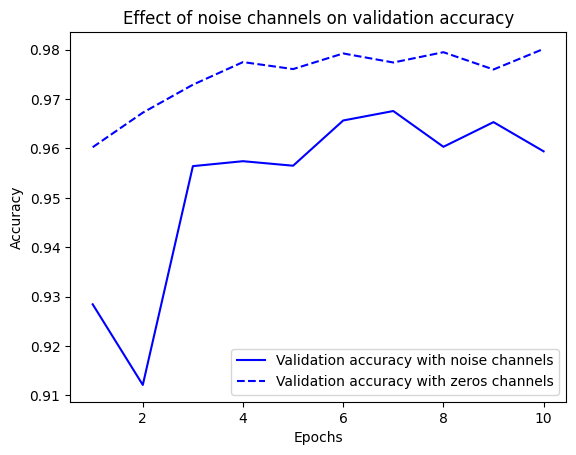

In [6]:
#5-3 검증 정확도 비교 그래프 그리기

import matplotlib.pyplot as plt # 데이터 시각화를 위한 Matplotlib
# 학습 결과 비교를 위한 시각화
# history_noise와 history_zeros에서 검증 정확도(val_accuracy)를 가져옴
val_acc_noise = history_noise.history["val_accuracy"]  # 무작위 노이즈 채널 데이터의 검증 정확도
val_acc_zeros = history_zeros.history["val_accuracy"]  # 제로 채널 데이터의 검증 정확도

# 에포크 범위 설정 (1부터 10까지)
epochs = range(1, 11)

# 검증 정확도 그래프 그리기
plt.plot(epochs, val_acc_noise, "b-",          # 무작위 노이즈 채널 데이터: 파란 실선
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",         # 제로 채널 데이터: 파란 점선
         label="Validation accuracy with zeros channels")

# 그래프 제목과 축 레이블 설정
plt.title("Effect of noise channels on validation accuracy")  # 그래프 제목
plt.xlabel("Epochs")                                         # x축: 에포크
plt.ylabel("Accuracy")                                       # y축: 정확도

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()


In [7]:
#5-4 랜덤하게 섞은 레이블로 MNIST 모델 훈련하기
# 새로운 실험: 무작위로 섞인 레이블을 사용하여 모델 학습
random_train_labels = train_labels[:]  # 기존 레이블을 복사
np.random.shuffle(random_train_labels) # 레이블 순서를 무작위로 섞음

# 새로운 모델 정의
model = keras.Sequential([
    layers.Dense(512, activation="relu"),       # 은닉층: 512개의 뉴런, ReLU 활성화
    layers.Dense(10, activation="softmax")     # 출력층: 10개의 뉴런, Softmax 활성화 (다중 클래스 분류)
])
model.compile(
    optimizer="rmsprop",                       # RMSprop 옵티마이저
    loss="sparse_categorical_crossentropy",    # 희소 카테고리 크로스 엔트로피 손실 함수
    metrics=["accuracy"]                      # 평가 지표: 정확도
)

# 모델 학습 (무작위로 섞인 레이블 사용)
model.fit(
    train_images,                                # 원본 이미지 데이터를 입력으로 사용
    random_train_labels,                         # 무작위로 섞인 레이블 사용
    epochs=100,                                  # 에포크 수: 100회
    batch_size=128,                              # 배치 크기: 128
    validation_split=0.2                         # 검증 데이터로 20% 사용
)


Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1024 - loss: 2.3341 - val_accuracy: 0.1079 - val_loss: 2.3054
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1180 - loss: 2.2982 - val_accuracy: 0.1014 - val_loss: 2.3117
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1281 - loss: 2.2886 - val_accuracy: 0.1054 - val_loss: 2.3162
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1430 - loss: 2.2746 - val_accuracy: 0.1037 - val_loss: 2.3264
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1563 - loss: 2.2580 - val_accuracy: 0.1032 - val_loss: 2.3339
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1689 - loss: 2.2382 - val_accuracy: 0.0988 - val_loss: 2.3548
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1880 - loss: 2.2148 - val_accuracy: 0.0999 - val_loss: 2.3640
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1991 - loss: 2.1870 - val_

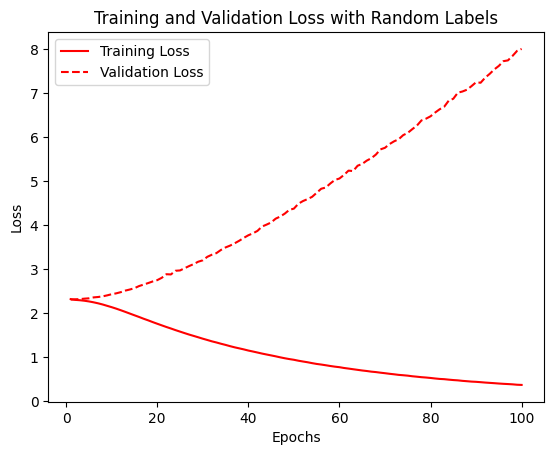

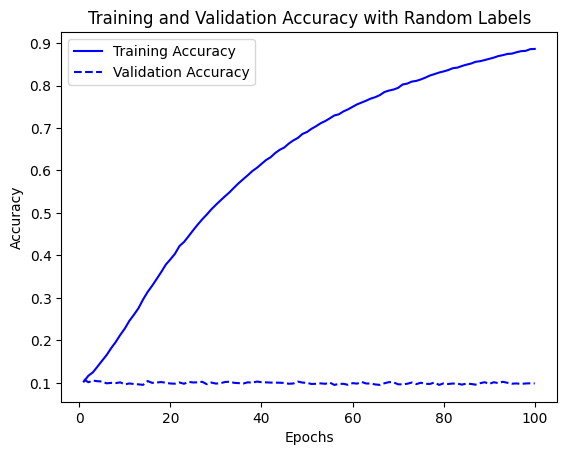

In [8]:
history_random = model.history.history  # 무작위 레이블 학습 결과 가져오기

# 에포크 범위 설정
epochs = range(1, len(history_random['loss']) + 1)

# 학습 손실 그래프
plt.figure()
plt.plot(epochs, history_random['loss'], 'r-', label='Training Loss')
plt.plot(epochs, history_random['val_loss'], 'r--', label='Validation Loss')
plt.title('Training and Validation Loss with Random Labels')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습 정확도 그래프
plt.figure()
plt.plot(epochs, history_random['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history_random['val_accuracy'], 'b--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Random Labels')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
